<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Исследуем-классификацию-логистической-регрессии" data-toc-modified-id="Исследуем-классификацию-логистической-регрессии-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследуем классификацию логистической регрессии</a></span></li><li><span><a href="#Исследуем-дерево-решений" data-toc-modified-id="Исследуем-дерево-решений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследуем дерево решений</a></span></li><li><span><a href="#Исследуем-Случайный-лес" data-toc-modified-id="Исследуем-Случайный-лес-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем Случайный лес</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Увеличим-выборку" data-toc-modified-id="Увеличим-выборку-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Увеличим выборку</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Дерево-решений-и-случайный-лес" data-toc-modified-id="Дерево-решений-и-случайный-лес-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Дерево решений и случайный лес</a></span></li></ul></li><li><span><a href="#Уменьшим-выборку" data-toc-modified-id="Уменьшим-выборку-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Уменьшим выборку</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Дерево-решений-и-случайный-лес" data-toc-modified-id="Дерево-решений-и-случайный-лес-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Дерево решений и случайный лес</a></span></li></ul></li><li><span><a href="#Поиск-лучшей-модели" data-toc-modified-id="Поиск-лучшей-модели-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Поиск лучшей модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов

Из Банка стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Необходимо построить модель с предельно большим значением *F1*-меры. Метрика должна быть больше 0.59.



Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Признаки
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата


Целевой признак
- Exited — факт ухода клиента

## Подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.utils import shuffle

In [ ]:
data = pd.read_csv('/datasets/Churn.csv')

In [ ]:
pd.set_option('max_columns', None)

In [ ]:
RANDOM_STATE = 123

In [ ]:
def data_info(df):
    display(df.info())
    display(df.head(10))
    df_na = pd.DataFrame(df.isna().sum())
    df_na.columns = ['count_na']
    print('')
    print('Проверим пустые значения:')
    display(df_na[df_na['count_na'] > 0])


In [ ]:
data_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0



Проверим пустые значения:


,count_na
Tenure,909


In [ ]:
data['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [ ]:
data['Tenure'] = data['Tenure'].astype(str)
data['Tenure'] = data['Tenure'].fillna('unknown')

In [ ]:
data['Tenure'].isna().sum()

0

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**Проверка полных дубликатов**

In [ ]:
data.duplicated().sum()

0

Удалим неинформативные признаки

In [ ]:
data = data.drop(columns=['Surname', 'RowNumber', 'CustomerId'])

**Напишем функцию, которая будет кодировать категориальные признаки разными методами в зависимости от алгоритма**

In [ ]:
categorial_cols = ['Geography', 'Gender', 'Tenure']

In [ ]:
def data_ordinal_encode(df, func_name, cols):
    if (func_name == 'get_dummies'):
        data_ohe = pd.get_dummies(df, drop_first=True, columns=cols)
    else:
        if(func_name == 'OrdinalEncoder'):
            encoder = OrdinalEncoder()
            df[cols] = encoder.fit_transform(df[cols])
            data_ohe = df
    return data_ohe

In [ ]:
def data_split_scale(df):
    target = df['Exited']
    features = df.drop('Exited', axis=1)

    #50% - данные для обучения
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.5, random_state=RANDOM_STATE, stratify=target)

    #50% - делим на валидационные данные (25%) и на тестовые (25%)
    features_valid, features_test, target_valid, target_test = train_test_split(
        features_valid, target_valid, test_size=0.5, random_state=RANDOM_STATE, stratify=target_valid)

    numeric = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']

    scaler = StandardScaler()
    scaler.fit(features_train[numeric])

    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])
    features_test[numeric] = scaler.transform(features_test[numeric])
    return features_train, features_valid, features_test, target_train, target_valid, target_test

In [ ]:
data_numeric = data_ordinal_encode(data, 'OrdinalEncoder', categorial_cols)
data_ohe = data_ordinal_encode(data, 'get_dummies', categorial_cols)

In [ ]:
data_numeric.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0.0,0.0,42,3.0,0.00,1,1,1,101348.88,1
1,608,2.0,0.0,41,1.0,83807.86,1,0,1,112542.58,0
2,502,0.0,0.0,42,9.0,159660.80,3,1,0,113931.57,1
3,699,0.0,0.0,39,1.0,0.00,2,0,0,93826.63,0
4,850,2.0,0.0,43,3.0,125510.82,1,1,1,79084.10,0


In [ ]:
data_ohe.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1.0,Geography_2.0,Gender_1.0,Tenure_1.0,Tenure_2.0,Tenure_3.0,Tenure_4.0,Tenure_5.0,Tenure_6.0,Tenure_7.0,Tenure_8.0,Tenure_9.0,Tenure_10.0,Tenure_11.0
0,619,42,0.00,1,1,1,101348.88,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,608,41,83807.86,1,0,1,112542.58,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,502,42,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,699,39,0.00,2,0,0,93826.63,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,850,43,125510.82,1,1,1,79084.10,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
features_train_ohe, features_valid_ohe, features_test_ohe, target_train_ohe, target_valid_ohe, target_test_ohe = data_split_scale(data_ohe)
features_train_numeric, features_valid_numeric, features_test_numeric, target_train_numeric, target_valid_numeric, target_test_numeric = data_split_scale(data_numeric)

/tmp/ipykernel_31/2932045499.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_31/2932045499.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

### Вывод

1. Удалили столбец `Surname`. Т.к. от фамилии врядли зависит исход.
2. Преобразовали столбец `Tenure` в строковую и заполнил пропуски значением `unknown`
3. Преобразовали категориальные колонки `'Geography', 'Gender', 'Tenure'` в количественные. Для классификации линейной регрессии методом `ohe`, для дерева решений и для случайного леса методом `ordinal encode`
4. Разбили датафреймы на `train` 50%, `valid` 25% и `test` 25% с параметром `stratify`
5. Стандартизировали значения для количественных колонок `'CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary'`

## Исследование задачи

Проверим дисбаланс классов

In [ ]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### Исследуем классификацию логистической регрессии

In [ ]:
features_train_ohe.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1.0,Geography_2.0,Gender_1.0,Tenure_1.0,Tenure_2.0,Tenure_3.0,Tenure_4.0,Tenure_5.0,Tenure_6.0,Tenure_7.0,Tenure_8.0,Tenure_9.0,Tenure_10.0,Tenure_11.0
8035,-0.752722,-0.876278,0.270932,0.813149,0,1,0.440588,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4664,0.486320,-1.560763,-1.208804,0.813149,1,1,-0.365169,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6190,-0.711420,0.394909,1.514298,-0.925092,0,1,-0.011436,0,1,0,0,0,0,0,1,0,0,0,0,0,0
8922,-1.031506,-0.387360,0.869016,0.813149,1,0,1.663721,1,0,1,0,0,0,0,0,0,0,0,0,1,0
4967,-0.298407,0.101558,1.577567,2.551391,1,0,1.235231,1,0,1,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
model = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE)
model.fit(features_train_ohe, target_train_ohe)

LogisticRegression(random_state=123, solver='liblinear')

In [ ]:
def data_score(model, features, target):
    predicted = model.predict(features)

    probabilities = model.predict_proba(features)
    probabilities_one = probabilities[:, 1]

    print('Матрица ошибок:')
    print(confusion_matrix(target, predicted))
    print('')
    print('Полнота:')
    print(recall_score(target, predicted))
    print('')
    print('Точность:')
    print(precision_score(target, predicted))
    print('')
    print('F1:')
    print(f1_score(target, predicted))
    print('')
    print('Значение AUC-ROC:')
    print(roc_auc_score(target, probabilities_one))

In [ ]:
data_score(model, features_valid_ohe, target_valid_ohe)

Матрица ошибок:
[[1904   87]
 [ 403  106]]

Полнота:
0.2082514734774067

Точность:
0.5492227979274611

F1:
0.301994301994302

Значение AUC-ROC:
0.7521883840741095


### Исследуем дерево решений

In [ ]:
features_train_numeric.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8035,-0.752722,0.0,0.0,-0.876278,9.0,0.270932,0.813149,0,1,0.440588
4664,0.486320,0.0,0.0,-1.560763,2.0,-1.208804,0.813149,1,1,-0.365169
6190,-0.711420,2.0,0.0,0.394909,5.0,1.514298,-0.925092,0,1,-0.011436
8922,-1.031506,1.0,1.0,-0.387360,10.0,0.869016,0.813149,1,0,1.663721
4967,-0.298407,1.0,1.0,0.101558,9.0,1.577567,2.551391,1,0,1.235231


In [ ]:
model = DecisionTreeClassifier(random_state=RANDOM_STATE)
model.fit(features_train_numeric, target_train_numeric)

DecisionTreeClassifier(random_state=123)

In [ ]:
data_score(model, features_valid_numeric, target_valid_numeric)

Матрица ошибок:
[[1700  291]
 [ 244  265]]

Полнота:
0.5206286836935167

Точность:
0.4766187050359712

F1:
0.4976525821596244

Значение AUC-ROC:
0.6872354869999477


### Исследуем Случайный лес

In [ ]:
model = RandomForestClassifier(n_estimators = 20, max_depth = 7, random_state=RANDOM_STATE)
model.fit(features_train_numeric, target_train_numeric)

RandomForestClassifier(max_depth=7, n_estimators=20, random_state=123)

In [ ]:
data_score(model, features_valid_numeric, target_valid_numeric)

Матрица ошибок:
[[1942   49]
 [ 301  208]]

Полнота:
0.4086444007858546

Точность:
0.8093385214007782

F1:
0.5430809399477806

Значение AUC-ROC:
0.8423786212810298


### Вывод

1. Классы разбились в пропорции 80% - отрицательных и 20% положительны. Имеем дисбаланс классов.
2. Результаты метрики F1:
    - Классификация линейной регрессии = 0.301994301994302
    - Дерево решений = 0.4976525821596244
    - Случайный лес = 0.5430809399477806
3. Значения метрики AUC-ROC:
    - Классификация линейной регрессии = 0.7521883840741095
    - Дерево решений = 0.6872354869999477
    - Случайный лес = 0.8423786212810298
4. Лучше всего показала модель случайного леса.

## Борьба с дисбалансом

### Увеличим выборку

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=RANDOM_STATE)

    return features_upsampled, target_upsampled

#### Логистическая регрессия

In [ ]:
# увеличим выборку в 4 раза
features_upsampled, target_upsampled = upsample(features_train_ohe, target_train_ohe, 4)

In [ ]:
# посчитаем метрику
model = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)

data_score(model, features_valid_ohe, target_valid_ohe)

Матрица ошибок:
[[1409  582]
 [ 166  343]]

Полнота:
0.6738703339882122

Точность:
0.3708108108108108

F1:
0.4783821478382148

Значение AUC-ROC:
0.7540967753712926


#### Дерево решений и случайный лес

In [ ]:
# увеличим выборку в 4 раза
features_upsampled, target_upsampled = upsample(features_train_numeric, target_train_numeric, 4)

In [ ]:
model = DecisionTreeClassifier(random_state=RANDOM_STATE)
model.fit(features_upsampled, target_upsampled)

data_score(model, features_valid_numeric, target_valid_numeric)

Матрица ошибок:
[[1731  260]
 [ 280  229]]

Полнота:
0.449901768172888

Точность:
0.46830265848670755

F1:
0.45891783567134264

Значение AUC-ROC:
0.6596570618865445


In [ ]:
model = RandomForestClassifier(n_estimators = 20, max_depth = 7, class_weight='balanced', random_state=RANDOM_STATE)
model.fit(features_upsampled, target_upsampled)

data_score(model, features_valid_numeric, target_valid_numeric)

Матрица ошибок:
[[1614  377]
 [ 157  352]]

Полнота:
0.6915520628683693

Точность:
0.4828532235939643

F1:
0.568659127625202

Значение AUC-ROC:
0.84036464680453


### Уменьшим выборку

In [ ]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=RANDOM_STATE)

    return features_downsampled, target_downsampled

#### Логистическая регрессия

In [ ]:
features_downsampled, target_downsampled = downsample(features_train_ohe, target_train_ohe, 0.275)
target_downsampled.value_counts()

0    1095
1    1019
Name: Exited, dtype: int64

In [ ]:
# посчитаем метрику
model = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE, class_weight='balanced')
model.fit(features_downsampled, target_downsampled)

data_score(model, features_valid_ohe, target_valid_ohe)

Матрица ошибок:
[[1424  567]
 [ 167  342]]

Полнота:
0.6719056974459725

Точность:
0.37623762376237624

F1:
0.48236953455571224

Значение AUC-ROC:
0.7534632762953921


#### Дерево решений и случайный лес

In [ ]:
features_downsampled, target_downsampled = downsample(features_train_numeric, target_train_numeric, 0.275)

In [ ]:
model = DecisionTreeClassifier(random_state=RANDOM_STATE)
model.fit(features_downsampled, target_downsampled)

data_score(model, features_valid_numeric, target_valid_numeric)

Матрица ошибок:
[[1432  559]
 [ 178  331]]

Полнота:
0.650294695481336

Точность:
0.37191011235955057

F1:
0.47319513938527524

Значение AUC-ROC:
0.684765630010884


In [ ]:
# посчитаем метрику
model = RandomForestClassifier(n_estimators = 20, max_depth = 7, class_weight='balanced', random_state=RANDOM_STATE)
model.fit(features_downsampled, target_downsampled)

data_score(model, features_valid_numeric, target_valid_numeric)

Матрица ошибок:
[[1593  398]
 [ 162  347]]

Полнота:
0.6817288801571709

Точность:
0.4657718120805369

F1:
0.5534290271132376

Значение AUC-ROC:
0.8257186810194007


### Поиск лучшей модели

**Комментарий**

Upsample улучшил модель

Попробуем подобрать более точные параметры для лучшего результата

In [ ]:
features_upsampled, target_upsampled = upsample(features_train_numeric, target_train_numeric, 4)

model_best = None
f1 = 0.0
f1_best = 0.0
depth_best = 0
est_best = 0

for depth in range(5, 11, 1):
    for est in range(10, 100, 5):
        model = RandomForestClassifier(n_estimators = est, max_depth = depth, class_weight='balanced', random_state=RANDOM_STATE)
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid_numeric)
        f1 = f1_score(target_valid_numeric, predicted_valid_numeric)

        if f1 > f1_best:
            f1_best = f1
            model_best = model
            depth_best = depth
            est_best = est

print('Лучшая модель: ')
print(f'Параметры depth = {depth_best}, n_estimators = {est_best}')
print('')
data_score(model_best, features_valid_numeric, target_valid_numeric)


Лучшая модель: 
Параметры depth = 10, n_estimators = 75

Матрица ошибок:
[[1723  268]
 [ 175  334]]

Полнота:
0.656188605108055

Точность:
0.5548172757475083

F1:
0.6012601260126013

Значение AUC-ROC:
0.8436569671577108


### Вывод

1. Сделали upsample для положительного класса в 4 раза. При увеличении в 4 раза были получены лучшие результаты.
2. Сделали downsample для отрицательных классов. Взяли 27.5% значений отрицательного класса
3. При upsample получили результаты лучше, чем при downsample.
4. Лучше всего показала модель случайного леса при upsample. Метрика F1 = 0.568659127625202
5. Для модели случайного леса подобрали параметры `n_estimators и max_depth`. Получили значение метрики f1 = 0.6012601260126013, что удовлетворяет условиям поставленной задачи.
6. AUC-ROC для модели случайного леса = 0.8436569671577108, что не идеально, но лучше чем угадывать случайным образом.

## Тестирование модели

In [ ]:
def plot_roc_curve(model, features, target):
    probabilities = model.predict_proba(features)
    probabilities_one = probabilities[:, 1]

    fpr, tpr, thresholds = roc_curve(target, probabilities_one)

    plt.figure()

    plt.plot(fpr, tpr)

    # ROC-кривая случайной модели (выглядит как прямая)
    plt.plot([0, 1], [0, 1], linestyle='--')

    # < примените функции plt.xlim() и plt.ylim(), чтобы
    #   установить границы осей от 0 до 1 >
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])


    # < примените функции plt.xlabel() и plt.ylabel(), чтобы
    #   подписать оси "False Positive Rate" и "True Positive Rate" >
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # < добавьте к графику заголовок "ROC-кривая" функцией plt.title() >
    plt.title('ROC-кривая')

    plt.show()

    auc_roc = roc_auc_score(target, probabilities_one)
    print('Значение AUC-ROC:', auc_roc)

    return

In [ ]:
# посчитаем метрику для тестовых данных
data_score(model_best, features_test_numeric, target_test_numeric)

Матрица ошибок:
[[1724  267]
 [ 163  346]]

Полнота:
0.6797642436149313

Точность:
0.564437194127243

F1:
0.6167557932263814

Значение AUC-ROC:
0.8627773902008943


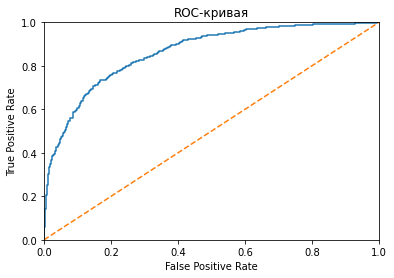

Значение AUC-ROC: 0.8627773902008943


In [ ]:
plot_roc_curve(model_best, features_test_numeric, target_test_numeric)

CreditScore        0.088460
Geography          0.039376
Gender             0.027712
Age                0.340931
Tenure             0.053455
Balance            0.114634
NumOfProducts      0.182194
HasCrCard          0.012974
IsActiveMember     0.047117
EstimatedSalary    0.093148
dtype: float64


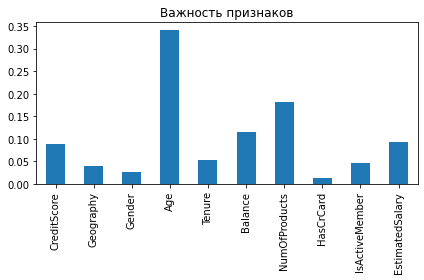

In [ ]:
importances = model_best.feature_importances_

feature_names = features_test.columns
#[f"feature {i}" for i in range(features_test.shape[1])]

#std = np.std([tree.feature_importances_ for tree in model_best.estimators_], axis=0)
forest_importances = pd.Series(model_best.feature_importances_, index=feature_names)
print (forest_importances)

fig, ax = plt.subplots()
#forest_importances.plot.bar(yerr=std, ax=ax)
forest_importances.plot.bar(ax=ax)
ax.set_title("Важность признаков")
fig.tight_layout()

### Вывод

1. Протестировали лучшую модель случайного леса с параметрами `n_estimators` = 90 и `max_depth` = 10 на тестовых данных.
2. Получили результат метрики F1 = 0.6148346738159071, что удовлетворяет требованиям задачи.
3. Построили ROC кривую. Значение метрики AUC-ROC = 0.8575751984125026.

## Вывод

При поиске модели было сделано:

1. Подготовлены данные
        - Удален лишний столбец
        - Обработаны пропуски
        - Стандартизированы значения
        - Преобразованы категориальные признаки
        - Разбит датафрейм на тренировочный, валидационный и тестовый
2. Исследован датафрейм на дисбаланс классов
3. Изучили несколько вариантов исправления дисбаланса классов. Лучшим методом является upsample.
4. Изучили разные модели: `Классификации логистической регрессии, дерево решений, случайный лес`. Лучшая модель `Случайный лес`
5. Подобрали параметры для модели случайного леса.
6. Достигли значения F1 больше `0.59`, которые были поставлены в задаче
7. Протестировали модель на тестовых данных и подтвердили выбранную модель как рабочую. На тестовых данных значение метрики F1 = `0.61`